# Bias-Variance Decomposition

In machine learning, predictive models aim to minimize their error on unseen data. This error can be broken down into three components: **Bias**, **Variance**, and **Irreducible Error**. The bias-variance decomposition helps us understand how these components contribute to the overall error.

Let's consider a regression problem where we aim to predict a target variable $y$ given features $x$. The true relationship between $X$ and $Y$ can be expressed as:

$$y = f(x) + \varepsilon$$

Where:
- $f(X)$ is the true (but unknown) function that maps features to the target.
- $\epsilon$ is random noise with zero mean and constant variance $\sigma^2$.

$\mathbb{E} \varepsilon = 0,  \mathbb{V}\text{ar} \varepsilon = \mathbb{E} \varepsilon^2 = \sigma^2.$  

The goal of our model is to estimate $f(X)$.

Short Refresher:

$$
\begin{align*}
\mathbb{V}\text{ar} [f(x)] &= \mathbb{E}_x [f(x) - \mathbb{E}_x[f(x)]]^2 \\
    &= \mathbb{E}_x [f^2(x) - 2f(x) \mathbb{E}_x [f(x)] + \mathbb{E}_x [f(x)]^2] \\
    &= \mathbb{E}_x [f^2(x)] - 2  \mathbb{E}_x [f(x) \mathbb{E}_x [f(x)]] +  \mathbb{E}_x[\mathbb{E}_x [f(x)]^2] \\
    &= \mathbb{E}_x [f^2(x)] - 2  \mathbb{E}_x [f(x)] \mathbb{E}_x [f(x)] + \mathbb{E}_x [f(x)]^2 \\
    &= \mathbb{E}_x [f^2(x)] - 2  \mathbb{E}_x [f(x)]^2 + \mathbb{E}_x [f(x)]^2 \\
    &= \mathbb{E}_x [f^2(x)] -   \mathbb{E}_x [f(x)]^2\\
    \\
\text{Bias} [f(x)] &= f(x) - \mathbb{E}_x[f(x)] \\
\end{align*}
$$

$$
\begin{align*}
&\mathbb{E}_x[c] = c \;\text{  (c: constant)}\\
&\mathbb{E}_x[cx] = c\mathbb{E}_x[x] \;\text{  (c: constant)}\\
&\mathbb{E}_x[\mathbb{E}_x[x]] = \mathbb{E}_x[x]\\
&\mathbb{E}_{x,y}[x + y] = \mathbb{E}_{x,y}[x] + \mathbb{E}_{x,y}[y]\\
&\mathbb{E}_{x,y}[xy] = \mathbb{E}_{x}[x]\mathbb{E}_{y}[y] \;\text{  (x,y: independent)}\\
\end{align*}


Let's assume we have subsample of the dataset $X$:  
$$ X = ((x_1, y_1), \ldots (x_l, y_l))$$ 

And the estimator of $y$ : $a(x)$, trained on this subsample $X$.
$$a(x) = a(x, X)$$
The goal of estimator is to correctly estimate the function $f(x)$, given the subsample $X$. Note that the target value $y$ is the function of $x \text{ and } \varepsilon$:  
$$y(x) = y(x, \varepsilon)$$

The joined expectation $\mathbb{E}_{X,\varepsilon} = \mathbb{E}_{X}\mathbb{E}_{\varepsilon}$ because $X$ and $\varepsilon$ are independent.

Let $x$ be test objects not present in training subsample $X$. The Mean Squared Error on test dataset will be:
$$ Q(a) = \mathbb{E}_x \mathbb{E}_{X, \varepsilon}\left[y(x, \varepsilon) - a(x, X)\right]^2$$

Now we expand the MSE expression and regroup it:

$$
\begin{align*}
&\mathbb{E}_{X, \varepsilon}\left[y(x, \varepsilon) - a(x, X)\right]^2 = \\
&= \mathbb{E}_{X, \varepsilon}\left[f(x) + \varepsilon -a(x, X)\right]^2 \\
&= \mathbb{E}_{X, \varepsilon}\left[(f(x) - a(x, X)) + \varepsilon\right]^2 \\
&= \mathbb{E}_{X, \varepsilon}\left[(f(x) - a(x, X))^2 + 2\cdot\varepsilon \cdot (f(x) - a(x, X)) + \varepsilon^2\right] \\
&= \underbrace{\mathbb{E}_{X, \varepsilon}\left[(f(x) - a(x, X))^2\right]}_{\text{does not depend on }\varepsilon} + 2\cdot \mathbb{E}_{X, \varepsilon}\underbrace{\left[\varepsilon \cdot(f(x) - a(x, X))\right]}_{\text{factors are independent}} +  \underbrace{\mathbb{E}_{X, \varepsilon}\left[\varepsilon^2\right]}_{\text{does not depend on }X} \\
&= \mathbb{E}_{X}\left[(f(x) - a(x, X))^2\right] + 2\cdot \underbrace{\mathbb{E}_{\varepsilon}\left[\varepsilon\right]}_{=0} \cdot\mathbb{E}_{X}\left[(f(x) - a(x, X))\right] +  \underbrace{\mathbb{E}_{\varepsilon}\left[\varepsilon^2\right]}_{=\sigma^2} \\
&= \mathbb{E}_{X}\left[(f(x) - a(x, X))^2\right] + 2 \cdot 0 \cdot\mathbb{E}_{X}\left[(f(x) - a(x, X))\right] +  \sigma^2 \\
&= \mathbb{E}_{X}\left[(f(x) - a(x, X))^2\right] +  \sigma^2 \\
\end{align*}
$$

Then we proceed with $\mathbb{E}_{X}\left[(f(x) - a(x, X))^2\right]$:  

$$
\begin{align*}
&\mathbb{E}_{X}\left[(f(x) - a(x, X))^2\right] =\\
&= \mathbb{E}_{X}\left[(f(x) -\mathbb{E}_{X}\left[a(x, X)\right] +\mathbb{E}_{X}\left[a(x, X)\right] - a(x, X))^2\right]  \\
&= \mathbb{E}_{X}\underbrace{\left[(f(x) -\mathbb{E}_{X}\left[a(x, X)\right])^2\right]}_{\text{does not depend on }X} +\underbrace{\mathbb{E}_{X}\left[( a(x, X)-\mathbb{E}_{X}\left[a(x, X)\right])^2\right]}_{=\mathbb{V}\text{ar}\left[ a(x, X)\right]} 
+2\cdot\mathbb{E}_{X}[\underbrace{(f(x) -\mathbb{E}_{X}\left[a(x, X)\right])}_{\text{does not depend on }X}
(\mathbb{E}_{X}\left[a(x, X)\right] - a(x, X))]  \\
&= (\underbrace{f(x) -\mathbb{E}_{X}\left[a(x, X)\right]}_{\text{Bias}_X a(x,X)})^2 + \mathbb{V}\text{ar}_X \left[a(x, X) \right] +2\cdot(f(x) -\mathbb{E}_{X}\left[a(x, X)\right])\cdot \mathbb{E}_{X}\left[(\mathbb{E}_{X}\left[a(x, X)\right] - a(x, X))\right]  \\
&= \text{Bias}^2_X\left[a(x, X)\right] + \mathbb{V}\text{ar}_X \left[a(x, X) \right] +2\cdot(f(x) -\mathbb{E}_{X}\left[a(x, X)\right])\cdot \underbrace{(\mathbb{E}_{X}\left[a(x, X)\right] - \mathbb{E}_{X}\left[a(x, X)\right])}_{=0} \\
&= \text{Bias}^2_X\left[a(x, X)\right] + \mathbb{V}\text{ar}_X \left[a(x, X) \right] +2\cdot(f(x) -\mathbb{E}_{X}\left[a(x, X)\right])\cdot 0  \\
&= \text{Bias}^2_X\left[a(x, X)\right] + \mathbb{V}\text{ar}_X \left[a(x, X) \right]  \\
\end{align*}


Putting all together, we have:

$$
\begin{align*}
 Q(a) &= \mathbb{E}_x \mathbb{E}_{X, \varepsilon}\left[y(x, \varepsilon) - a(x, X)\right]^2 \\
    &= \mathbb{E}_x \left[\text{Bias}^2_X\left[a(x, X)\right] + \mathbb{V}\text{ar}_X \left[a(x, X) \right] + \sigma^2\right]\\
    &= \mathbb{E}_x \text{Bias}^2_X\left[a(x, X)\right] + \mathbb{E}_x \mathbb{V}\text{ar}_X \left[a(x, X) \right] + \sigma^2\\
\end{align*}
$$

Where:


- $\text{Bias}^2_X\left[a(x, X)\right] =f(x) -\mathbb{E}_{X}\left[a(x, X)\right]$  
The bias of the algorithm's prediction at a point $x$, averaged over all possible training datasets $X$, relative to the true target function $f$.

- $\mathbb{V}\text{ar}_X[a(x, X)] = \mathbb{E}_X \left[ a(x, X) - \mathbb{E}_X[a(x, X)] \right]^2$  
The variance of an estimator of the algorithm's predictions depending on the training dataset $X$


- $ \sigma^2 = \mathbb{E}_x \mathbb{E}_\varepsilon[y(x, \varepsilon) - f(x)]^2$  
Irreducible noise in the data

# Bagging

The idea behind bagging (bootstrap aggregation) is as follows. Let the training dataset consist of $n$ objects. We randomly select $n$ examples with replacement from this dataset to create a new dataset $X_i$. In this new dataset, some elements from the original dataset may be missing, and some may appear multiple times. We then use an algorithm to train a model $b_i$ on this dataset $X_i$. This procedure is repeated $k$ times, resulting in $k$ models trained on $k$ different datasets. To make predictions, we average the predictions of all models:

$$a(x) = \frac{1}{k}(b_1(x) + \dots + b_k(x))$$

The process of generating sub-datasets using sampling with replacement is called bootstrapping, and the models are often referred to as base algorithms (although they might be better referred to as base models). The model $a(x)$ is called an ensemble of these models.

Let's examine the effect on prediction quality when transitioning from a single model to an ensemble. First, we will confirm that the bias of the ensemble remains unchanged compared to the average bias of individual models. We assume that when we take the expectation over all training datasets $X$, it includes all sub-datasets obtained by bootstrapping.

$$
\begin{align*}
\text{bias}_X a(x, X) &=f(x) - \mathbb{E}_X[a(x, X)] \\
&= f(x) - \mathbb{E}_X \left[ \frac{1}{k} \sum_{i = 1}^k b(x, X_i) \right] \\
&= f(x) - \frac{1}{k} \sum_{i = 1}^k \mathbb{E}_X \left[ b(x, X_i) \right] \\
&= f(x) - \frac{1}{k} \sum_{i = 1}^k \mathbb{E}_X \left[ b(x, X) \right] \\
&= f(x) -\frac{1}{k} \cdot k \cdot \mathbb{E}_X b(x, X)\\
&= f(x) - \mathbb{E}_X b(x, X) \\
&= \text{bias}_X b(x, X)
\end{align*}
$$

We have shown that the bias of the ensemble is equal to the bias of an individual algorithm. Now, let's investigate what happens to the variance.

$$
\begin{align*}
\mathbb{V}\text{ar}_X[a(x, X)] &= \mathbb{E}_X \left[ a(x, X) - \mathbb{E}_X[a(x, X)] \right]^2 \\
&= \mathbb{E}_X \left[ \frac{1}{k} \sum_{i = 1}^k b(x, X_i)- \mathbb{E}_X \left[ \frac{1}{k} \sum_{i = 1}^k b(x, X_i) \right] \right]^2 \\
&= \dfrac{1}{k^2}\mathbb{E}_X \left[\sum_{i = 1}^k (b(x, X_i)- \mathbb{E}_X b(x, X_i)) \right]^2\\
&= \dfrac{1}{k^2}\sum_{i = 1}^k\mathbb{E}_X (b(x, X_i)- \mathbb{E}_X b(x, X_i))^2 + \dfrac{1}{k^2}\sum_{k_1 \neq k_2}\mathbb{E}_X \left[(b(x, X_{k_1})- \mathbb{E}_X b(x, X_{k_1})) (b(x, X_{k_2})- \mathbb{E}_X b(x, X_{k_2}))\right]\\
&=\dfrac{1}{k^2}\sum_{i = 1}^k\mathbb{V}\text{ar}_X b(x, X_{i}) +  \dfrac{1}{k^2}\sum_{k_1 \neq k_2} \text{cov}(b(x, X_{k_1}))(b(x, X_{k_2}))
\end{align*}
$$

If base algorithms are uncorrelated, than $\text{cov}(b(x, X_{k_1}))(b(x, X_{k_2})) = 0$, and:

$$
\begin{align*}
\mathbb{V}\text{ar}_X[a(x, X)] &=\dfrac{1}{k^2}\sum_{i = 1}^k\mathbb{V}\text{ar}_X b(x, X_{i}) \\
&= \dfrac{1}{k^2}\sum_{i = 1}^k\mathbb{V}\text{ar}_X b(x, X) \\
&= \dfrac{1}{k^2}\cdot k \cdot \mathbb{V}\text{ar}_X b(x, X) \\
&= \dfrac{1}{k}\mathbb{V}\text{ar}_X b(x, X) \\
\end{align*}
$$

### Algorithm: Random Forest

1: For $n = 1, \ldots, N$  
2: Generate a dataset $X_n$ using bootstrapping.  
3: Build a decision tree $b_n(x)$ using the dataset $X_n$:   
   - The tree is constructed until each leaf node contains no more than $n_{min}$ objects.  
   - At each split, first, select m random features from p, and the optimal split is searched only among them.  
    
4: Return the ensemble $a_n(x) = \frac{1} {N} \sum_{i=1}^N b_n(x)$, for $n = 1$ to $N$.


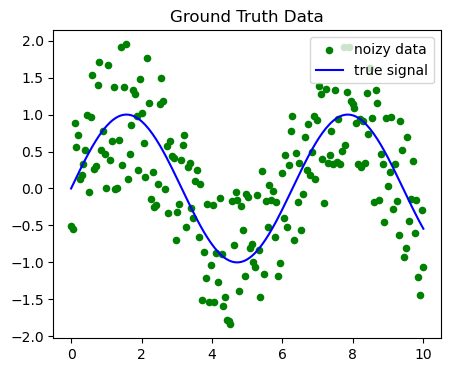

In [26]:
import numpy as np
from mllib.random_forest import RandomForestRegressor
import matplotlib.pyplot as plt 

def get_data(n_samples=200):
    k = 1.
    n = 2
    x = np.linspace(0, 10, n_samples)
    y_true = k*np.sin(x) 
    y_noizy = y_true + n*np.random.random(x.size) - 0.5*n
    return x, y_true, y_noizy
    
x, y_true, y = get_data()


plt.figure(figsize=(5, 4))
plt.scatter(x, y, color="g", s=20, label="noizy data")
plt.plot(x, y_true, color="b", label="true signal")
plt.title("Ground Truth Data")
plt.legend(loc="upper right")
plt.show()


Let's check the variance of Random Forest with single base model:

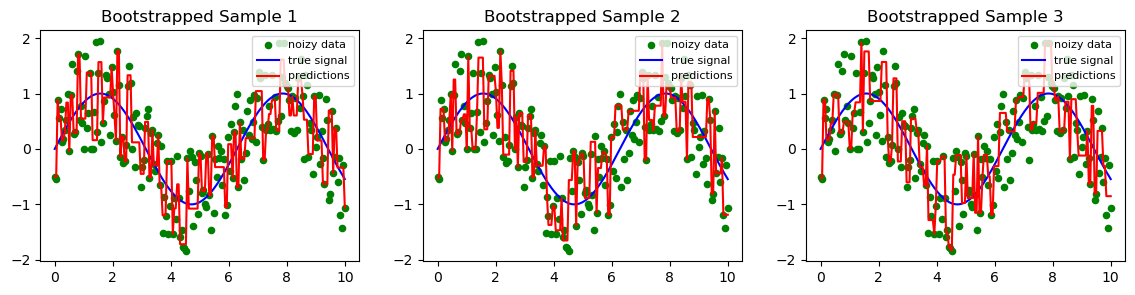

In [27]:
plt.figure(figsize=(14, 3))
for i in range(3):
    rf = RandomForestRegressor(n_estimators=1)
    rf.fit(np.expand_dims(x, 1), y)
    y_pred = rf.predict(np.expand_dims(x, 1))

    plt.subplot2grid((1, 3), (0, i))
    #plt.subplot(1, 3, i + 1)
    plt.scatter(x, y, color="g", s=20, label="noizy data")
    plt.plot(x, y_true, color="b", label="true signal")
    plt.plot(x, y_pred, color="r", label="predictions")
    plt.title(f"Bootstrapped Sample {i+1}")
    plt.legend(loc="upper right", fontsize=8)

Now we investigate the effect of base model averaging:

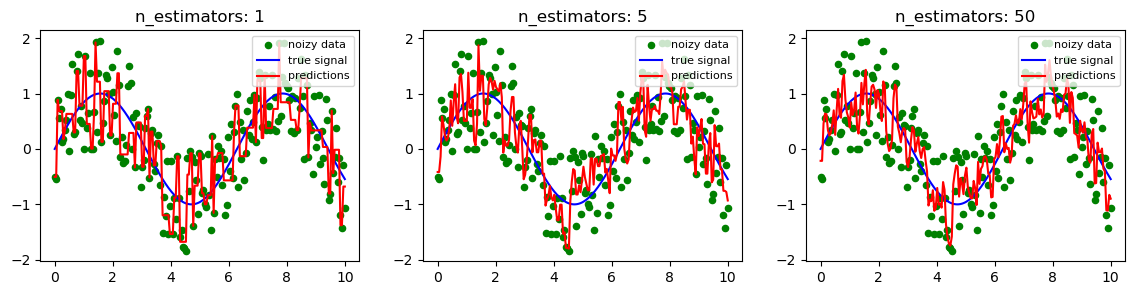

In [44]:
estimators = [1, 5, 50]
plt.figure(figsize=(14, 3))
for i in range(3):
    rf = RandomForestRegressor(n_estimators=estimators[i], min_samples_split=5)
    rf.fit(np.expand_dims(x, 1), y)
    y_pred = rf.predict(np.expand_dims(x, 1))

    plt.subplot2grid((1, 3), (0, i))
    #plt.subplot(1, 3, i + 1)
    plt.scatter(x, y, color="g", s=20, label="noizy data")
    plt.plot(x, y_true, color="b", label="true signal")
    plt.plot(x, y_pred, color="r", label="predictions")
    plt.title(f"n_estimators: {estimators[i]}")
    plt.legend(loc="upper right", fontsize=8)

And the same for sklearn implementation of Random Forest:

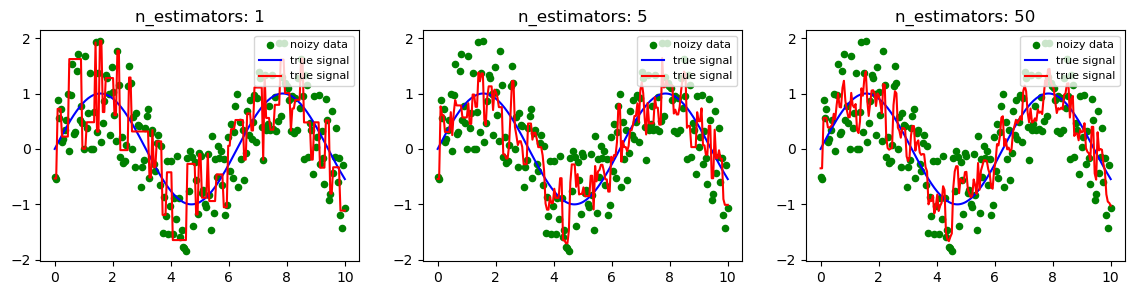

In [43]:
from sklearn.ensemble import RandomForestRegressor as RandomForestRegressor2

estimators = [1, 5, 50]
plt.figure(figsize=(14, 3))
for i in range(3):
    rf = RandomForestRegressor2(n_estimators=estimators[i], min_samples_split=5)
    rf.fit(np.expand_dims(x, 1), y)
    y_pred = rf.predict(np.expand_dims(x, 1))

    plt.subplot2grid((1, 3), (0, i))
    #plt.subplot(1, 3, i + 1)
    plt.scatter(x, y, color="g", s=20, label="noizy data")
    plt.plot(x, y_true, color="b", label="true signal")
    plt.plot(x, y_pred, color="r", label="true signal")
    plt.title(f"n_estimators: {estimators[i]}")
    plt.legend(loc="upper right", fontsize=8)